In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils as utils
pd.options.display.max_columns = None
pd.set_option("display.max_colwidth", -1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option("display.max_rows", None)

/home/nathaniel/anaconda3/envs/nba-predictor/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [2]:
games, season_games, teams, seasons, rankings, games_matchup = utils.load_df()

In [3]:
df1, df2, df3, df4, df5 = utils.load_experiment_datasets()

In [4]:
utils.X_y_values(df1)

In [5]:
utils.y.ravel()

array([1, 1, 1, ..., 1, 1, 1])

In [6]:
utils.do_experiments()

Experiment: do_logistic_regression
Running experiment for dataset: 1
Precision: 77.51%
Recall: 72.78%
Experiment: do_logistic_regression
Running experiment for dataset: 2
Precision: 80.29%
Recall: 78.93%
Experiment: do_logistic_regression
Running experiment for dataset: 3
Precision: 80.33%
Recall: 80.33%
Experiment: do_logistic_regression
Running experiment for dataset: 4
Precision: 80.67%
Recall: 82.44%
Experiment: do_logistic_regression
Running experiment for dataset: 5
Precision: 81.61%
Recall: 81.79%


In [12]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
# Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [13]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score

KNN: -0.164528 (0.063457)


KNeighborsClassifier()

Precision: 75.36%
Recall: 80.02%
-------------------------------------------------
SVM: -0.044460 (0.199499)


SVC(kernel='linear', random_state=0)

Precision: 81.19%
Recall: 82.89%
-------------------------------------------------
KSVM: 0.069127 (0.098450)


SVC(random_state=0)

Precision: 79.36%
Recall: 85.32%
-------------------------------------------------
NB: -0.370018 (0.120446)


GaussianNB()

Precision: 82.10%
Recall: 55.19%
-------------------------------------------------
DT: -0.489940 (0.078198)


DecisionTreeClassifier(criterion='entropy', random_state=0)

Precision: 70.31%
Recall: 70.31%
-------------------------------------------------
RF: 0.012060 (0.107456)


RandomForestClassifier(max_depth=15, max_features='sqrt', n_estimators=500,
                       n_jobs=-1, random_state=0)

Precision: 79.06%
Recall: 84.99%
-------------------------------------------------
GB: 0.004562 (0.084805)


GradientBoostingClassifier(max_depth=15, max_features='sqrt', n_estimators=500,
                           random_state=0)

Precision: 79.40%
Recall: 81.68%
-------------------------------------------------


{'whiskers': [<matplotlib.lines.Line2D at 0x7f898b0a3fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f898b0bee10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f898b0a3250>,
 'medians': [<matplotlib.lines.Line2D at 0x7f898b0b8a10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f898b0b8b90>,
 'means': []}

Text(0.5, 1.0, 'Algorithm Comparison')

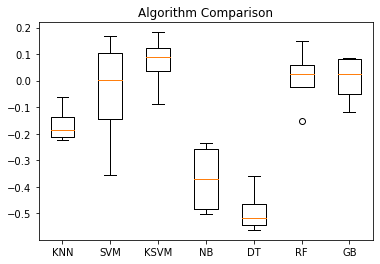

In [20]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2))) 
models.append(('SVM', SVC(kernel = 'linear', random_state=0))) 
models.append(('KSVM', SVC(kernel = 'rbf', random_state=0))) 
models.append(('NB', GaussianNB())) 
models.append(('DT', DecisionTreeClassifier(criterion = 'entropy', random_state=0))) 
models.append(("RF", RandomForestClassifier(n_estimators=500, 
                                            max_features="sqrt", 
                                            max_depth=15, 
                                            n_jobs=-1, 
                                            random_state = 0)))
models.append(("GB", GradientBoostingClassifier(n_estimators=500, 
                                                max_depth=15, 
                                                max_features="sqrt", 
                                                random_state = 0)))

# Ensemble method - collection of many decision trees

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=4)

    cv_results = cross_val_score(model, utils.X_train, utils.y_train.ravel(), cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
    model.fit(X=utils.X_train,y=utils.y_train.ravel())
    y_pred = model.predict(utils.X_test)
    print("Precision: {:.2f}%".format(100 * precision_score(utils.y_test, y_pred)))
    print("Recall: {:.2f}%".format(100 * recall_score(utils.y_test, y_pred)))
    print("-------------------------------------------------")
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [17]:
from sklearn.metrics import make_scorer
def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score
rmse_score = make_scorer(rmse, greater_is_better = False)

In [19]:
from sklearn.model_selection import GridSearchCV
model = GradientBoostingClassifier()
param_search = { 
    'n_estimators': [20, 50, 100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [i for i in range(5,15)]
}
tscv = TimeSeriesSplit(n_splits=4)
gsearch = GridSearchCV(estimator=model,
                       cv=tscv,
                       param_grid=param_search,
                       scoring = rmse_score)
gsearch.fit(utils.X_train, utils.y_train.ravel())
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
print(f"Best score: {best_score}, best model: {best_model}")

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=4),
             estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [20, 50, 100, 200]},
             scoring=make_scorer(rmse, greater_is_better=False))

Best score: -0.485160451606227, best model: GradientBoostingClassifier(max_depth=13, max_features='sqrt')
